In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import re
from itertools import islice
from nltk.corpus import wordnet 
from nltk import pos_tag, word_tokenize
from scipy.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

In [2]:
d = pd.read_csv('C:\\Users\\cindy\\OneDrive\\桌面\\linkedin data\\influencers_data.csv')

c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\interactiveshell.py:3194: DtypeWarning: Columns (0,4,12,13,15,16,17,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,82,83,84,85,86,87,89,90,91,92,93,94,96,97,98,99,100,101,102,103,104,105,106,107,108,110,111,112,113,114,115,117,118,119,120,121,122,124,125,126,127,128,129,131,132,133,134,135,136,138,139,140,141,142,143,145,146,147,148,149,150,152,153,154,155,156,157,159,160,161,162,163,164,167) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#drop redundant columns
d = d.drop(columns=['location','content_links','media_url','num_hashtags','hashtag_followers','views','votes'])
d = d.drop(d.filter(regex='Unnamed:').columns, axis=1)

In [4]:
d.dropna(inplace=True)
d['name'].nunique()

57

In [5]:
# create a list contained only influencers' names
name_l = d["name"].values.tolist()
name_list = []
for x in name_l:
    if x not in name_list:
        name_list.append(str(x))

#remove url and nan in the name list
name_l= [x for x in name_list if str(x) != 'nan']

def check_pres(sub, test):
    for ele in sub:
        if ele in test:
            return 0
    return 1
test = '[]'
name_list = [ele for ele in name_l if check_pres(ele, test)]

In [6]:
#names' of influencers
#show all rows(列)
pd.set_option('max_colwidth', None)
name_d = pd.DataFrame (name_list, columns = ['name'])

In [7]:
#Count comments with hashtags
from nltk.stem import WordNetLemmatizer

def process_content(content):
    wnl = WordNetLemmatizer()
    hashtag_list = []
    for c in content:
        c = c.lower()
        split = c.split(' ')
        f_split = [x.strip() for x in split if x.strip() != '']
        hashtag = [wnl.lemmatize(x.replace("#", ""), 'v') for x in f_split if x.startswith('#')] #turn all verb tenses into present tense
        hashtag_list.append(hashtag)
    return hashtag_list

grouped = d.groupby('name')
dict1 = {}
#manually remove weird hashtags
hashtags_to_remove = ['askamy', 'eq', 'caption', 'tbt', '2021opportunity', 'wordfor2021', 'presencenotpresents',
                     'present', 'zoomgloom', 'fictionwriting', 'bookstoread', 'yourstoriesdontdefineyou', '1:', '2:',
                     '3:', '24', 'iwd2020', '5:', 'youthempowerment', '4:', 'women', 'partnerships', 'fund',
                     'coronavirus', 'artificialintelligence']

for name in name_list:
    d_name = grouped.get_group(name)
    content_all = d_name.content.reset_index(drop=True)
    comments_all = d_name.comments.reset_index(drop=True)
    hashtag_list = process_content(content_all)
    for j, hashtags in enumerate(hashtag_list):
        if isinstance(comments_all[j], str) and not comments_all[j][0].isdigit():
            comments_all[j] = '0'
        if len(hashtags) != 0:
            for hashtag in hashtags:
                if hashtag not in hashtags_to_remove:
                    if hashtag in dict1:
                        dict1[hashtag] += float(comments_all[j]) / len(hashtags)
                    else:
                        dict1[hashtag] = float(comments_all[j]) / len(hashtags)

print(content_all)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [8]:
hashtag_list

[['career',
  'awareness',
  'clarity',
  'selftalk',
  'adaptability',
  'selfcare',
  'timemanagement',
  'thoughtleadership',
  'relationships',
  'illuminateme'],
 ['leadership',
  'socialmedia',
  'connection',
  'communication',
  'ghostwrite',
  'career',
  'personalbranding',
  'thoughtleadership',
  'illuminateme',
  'caption'],
 ['career', 'illuminateme', 'leadership', 'clarity', 'fear'],
 ['softskills',
  'emotionalintelligence',
  'leadership',
  'career',
  'illuminateme'],
 ['leadership', 'career', 'clarity', 'action', 'fear', 'illuminateme'],
 ['career', 'illuminateme', 'leadership'],
 ['leadership',
  'career',
  'positivity',
  'adaptability',
  'clarity',
  'timemanagement',
  'awareness',
  'illuminateme'],
 ['leadership',
  'socialmedia',
  'connection',
  'communication',
  'ghostwrite',
  'career',
  'personalbranding',
  'thoughtleadership',
  'illuminateme',
  'caption',
  'storytelling'],
 ['leadership',
  'career',
  'awareness',
  'clarity',
  'timemanagement

In [9]:
# Define the mappings
mappings = {
    'career': ['career'],
    'coronavirus': ['coronavirus', 'covid'],
    'entrepreneur': ['entrepreneur'],
    'leadership': ['leader'],
    'illuminate': ['illuminate'],
    'linkedin': ['linkedin'],
    'self': ['self'],
    'book': ['book'],
    'connect': ['connect'],
    'manage': ['manage'],
    'story': ['story'],
    'social': ['social']
}

# Perform the optimizations
for key, values in mappings.items():
    total = 0
    pop_index = []
    for k, v in dict1.items():
        if any(value in k for value in values):
            total += v
            pop_index.append(k)
    for i in pop_index:
        dict1.pop(i)
    dict1[key] = total / 10

In [10]:
dict2 = {}
wnl = WordNetLemmatizer()

hashtags_to_remove = [
    'askamy', 'eq', 'caption', 'tbt', '2021opportunity', 'wordfor2021', 'presencenotpresents',
    'present', 'zoomgloom', 'fictionwriting', 'bookstoread', 'yourstoriesdontdefineyou', '1:',
    '2:', '3:', '24', 'iwd2020', '5:', 'youthempowerment', '4:', 'women', 'partnerships',
    'fund', 'cororavirus', 'artificialintelligence'
]

for i in range(len(name_list)):
    d_name = grouped.get_group(name_list[i])
    reactions_all = d_name.reactions.reset_index(drop=True)
    content_all = d_name.content.reset_index(drop=True)
    hashtag_list1 = []
    
    for j in range(len(content_all)):
        hashtag1 = []
        content_all[j] = content_all[j].lower()
        split = content_all[j].split(' ')
        f_split = [x.strip() for x in split if x.strip() != '']
        
        for x in f_split:
            if x.startswith('#'):
                new_str1 = x[1:]
                new_str1 = wnl.lemmatize(new_str1, 'v')
                hashtag1.append(new_str1)
        
        hashtag_list1.append(hashtag1)
        
        if isinstance(reactions_all[j], str) and not reactions_all[j].isdigit():
            reactions_all[j] = '0'
        
        if len(hashtag1) != 0:
            for k in range(len(hashtag_list1[j])):
                hashtag = hashtag1[k]
                dict2[hashtag] = dict2.get(hashtag, 0) + float(reactions_all[j]) / len(hashtag_list1[j])

# Remove unwanted hashtags
for hashtag in hashtags_to_remove:
    dict2.pop(hashtag, None)

In [11]:
pop_items = [
    ("career", "career"),
    ("covid", "coronavirus"),
    ("entrepreneur", "entrepreneur"),
    ("leader", "leadership"),
    ("illuminate", "illuminate"),
    ("linkedin", "linkedin"),
    ("self", "self"),
    ("book", "book"),
    ("connect", "connect"),
    ("manage", "manage"),
    ("story", "story"),
    ("social", "social")
]

for keyword, new_key in pop_items:
    total = 0
    pop_index = []
    
    for key, value in dict2.items():
        if keyword in key:
            total += value
            pop_index.append(key)
    
    for i in pop_index:
        dict2.pop(i)
    
    dict2[new_key] = total if new_key != "leadership" else total / 10


In [12]:
pop_hashtags = [
    'askamy', 'eq', 'caption', 'tbt', '2021opportunity', 'wordfor2021', 'presencenotpresents',
    'present', 'zoomgloom', 'fictionwriting', 'bookstoread', 'yourstoriesdontdefineyou', '1:',
    '2:', '3:', '24', 'iwd2020', '5:', 'youthempowerment', '4:', 'women', 'partnerships',
    'fund', 'cororavirus', 'artificialintelligence'
]

dict3 = {}
for i in range(len(name_list)):
    d_name = grouped.get_group(name_list[i])
    followers_all = d_name.followers.reset_index(drop=True)
    content_all = d_name.content.reset_index(drop=True)
    hashtag_list1 = []
    for j in range(len(content_all)):
        hashtag1 = []
        content_all[j] = content_all[j].lower()
        split = content_all[j].split(' ')
        f_split = [x.strip() for x in split if x.strip() != '']
        for x in f_split:
            if x.startswith('#'):
                new_str1 = x[1:]
                new_str1 = wnl.lemmatize(new_str1, 'v')
                hashtag1.append(new_str1)
        hashtag_list1.append(hashtag1)
        if isinstance(followers_all[j], str) and not followers_all[j].isdigit():
            followers_all[j] = '0'
        if len(hashtag1) != 0:
            for k in range(len(hashtag_list1[j])):
                hashtag = hashtag1[k]
                dict3[hashtag] = dict3.get(hashtag, 0) + float(followers_all[j]) / len(hashtag_list1[j])

# Remove unwanted hashtags
for hashtag in pop_hashtags:
    dict3.pop(hashtag, None)

In [13]:
pop_keywords = [
    ("career", 10),
    ("coronavirus", 1),
    ("entrepreneur", 1),
    ("leader", 10),
    ("illuminate", 1),
    ("linkedin", 1),
    ("self", 1),
    ("book", 1),
    ("connect", 1),
    ("manage", 1),
    ("story", 1),
    ("social", 1)
]

dict3 = {}
for key, value in dict3.items():
    for keyword, divisor in pop_keywords:
        if keyword in key:
            dict3[keyword] = dict3.get(keyword, 0) + value
            pop_index = [k for k in dict3.keys() if keyword in k]
            for i in pop_index:
                dict3.pop(i)
            dict3[keyword] /= divisor
            break

In [14]:
# z-score normalized
# Calculate mean and standard deviation
mean1 = np.mean(list(dict1.values()))
std1 = np.std(list(dict1.values()))
mean2 = np.mean(list(dict2.values()))
std2 = np.std(list(dict2.values()))
mean3 = np.mean(list(dict3.values()))
std3 = np.std(list(dict3.values()))
# Create new dictionary for normalized data
normalized_data1 = {}
normalized_data2 = {}
normalized_data3 = {}
# Iterate over keys and values of original dictionary
for key, value in dict1.items():
    normalized_value1 = (value - mean1) / std1
    normalized_data1[key] = round(normalized_value1, 2)
for key, value in dict2.items():
    normalized_value2 = (value - mean2) / std2
    normalized_data2[key] = round(normalized_value2, 2)
for key, value in dict3.items():
    normalized_value3 = (value - mean3) / std3
    normalized_data3[key] = round(normalized_value3, 2)
print(normalized_data1,normalized_data2,normalized_data3)

c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


{'workbasedlearning': -0.05, 'usa': -0.05, 'apprenticeship': 0.03, 'urbanwire': -0.06, 'apprenticeships': -0.0, 'verifiedresumes': -0.05, 'research': 0.13, 'train': -0.03, 'coach': -0.05, 'futureofwork': 0.23, 'hire': 0.5, 'naw2020': -0.06, 'learninganddevelopment': -0.06, 'workforcetraining': -0.06, 'phoenixaz': -0.06, 'learningculture': -0.06, 'learningpods': -0.06, 'kentucky': -0.05, 'workforcedevelopment': -0.06, 'recruitmentsolutions': -0.06, 'practicaltips': -0.06, 'workexperience': -0.06, 'employability': -0.06, 'apprentice': -0.06, 'australiangovernment': -0.06, 'economicimpact': -0.03, 'stimuluspackage': -0.05, 'caronavirus': -0.06, 'workforcetrends': -0.06, 'asiapacific': -0.06, 'workers': -0.06, 'governments': -0.06, 'economic': -0.05, 'workforceplanning': -0.06, 'hr': 1.35, 'stem': 0.05, 'workforce': 0.01, 'cybersecurity': -0.0, 'australia': -0.04, 'buyorbuild': -0.05, 'modernapprenticeship': 0.03, 'shipbuilding': -0.05, 'studentdebt': -0.05, 'esso': -0.05, 'thereareoptions

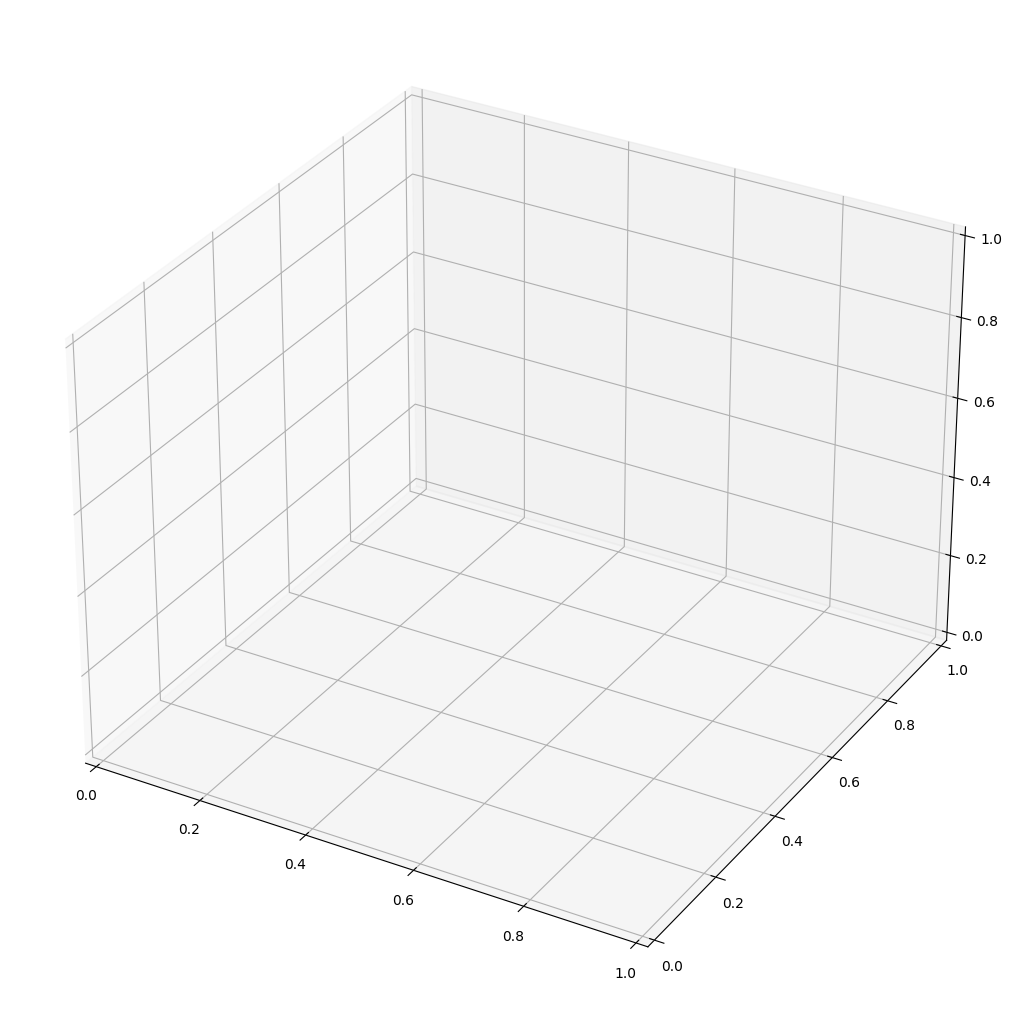

In [15]:
x_data = normalized_data1
y_data = normalized_data2
z_data = normalized_data3
s = {}
for key in x_data.keys():
    x = x_data[key]
    y = y_data.get(key, 0)
    z = z_data.get(key, 0)
    s[key] = x+y+z

s_list = sorted(s.items(), key=lambda x: x[1], reverse=True)
s_data = {}
for j in range(len(s_list)):
    for i in range(0, len(s_list[j]),2):
        s_data[s_list[j][i]] = s_list[j][i + 1]
top_five = []
count = 0
for i in s_data.keys():
    top_five += [i]
    count += 1
    if count == 7:
        break
fig = plt.figure(figsize=(13, 13))
ax = fig.add_subplot(111, projection='3d')

In [16]:
# Plot the data
for key in x_data.keys():
    x = x_data[key]
    y = y_data.get(key, 0)
    z = z_data.get(key, 0)
    if key in top_five:
        ax.scatter(x, y, z, label=key, alpha=0.8, color=['gold'])
        ax.text(x,y,z, f'({x}, {y}, {z})', ha='left', va='top')
        ax.text(x,y,z, key, ha='right')
        print(x,y,z,key)
    else:
        if x >= 0 and y >= 0 and z >= 0:
            ax.scatter(x, y, z, label=key, alpha=0.8, color=['skyblue'])
        if x < 0:
            ax.scatter(x, y, z, label=key, alpha=0.8, color=['cadetblue'])
        
# Set the axis labels
ax.set_xlabel('comments')
ax.set_ylabel('reactions')
ax.set_zlabel('followers')
plt.savefig('graph', bbox_inches='tight')

# Create a second figure for the legend
fig_legend = plt.figure(figsize=(16,16))
ax_legend = fig_legend.add_subplot(111)

# Create a legend and add it to the second figure
handles, labels = ax.get_legend_handles_labels()
ax_legend.legend(handles, labels, loc='center',ncol=7)
ax_legend.axis('off')
plt.savefig('label', bbox_inches='tight')

4.78 13.34 0 healthcare
11.6 13.65 0 business
6.49 18.47 0 digitalhealth
28.46 -0.09 0 wednesdaymotivation
28.48 -0.04 0 mayaangelou
70.58 67.6 0 justq
2.61 19.16 0 career


C:\Users\cindy\AppData\Local\Temp\ipykernel_28200\8779902.py:31: UserWarning: Glyph 34508 (\N{CJK UNIFIED IDEOGRAPH-86CC}) missing from current font.
  plt.savefig('label', bbox_inches='tight')
C:\Users\cindy\AppData\Local\Temp\ipykernel_28200\8779902.py:31: UserWarning: Glyph 34483 (\N{CJK UNIFIED IDEOGRAPH-86B3}) missing from current font.
  plt.savefig('label', bbox_inches='tight')
C:\Users\cindy\AppData\Local\Temp\ipykernel_28200\8779902.py:31: UserWarning: Glyph 34488 (\N{CJK UNIFIED IDEOGRAPH-86B8}) missing from current font.
  plt.savefig('label', bbox_inches='tight')
C:\Users\cindy\AppData\Local\Temp\ipykernel_28200\8779902.py:31: UserWarning: Glyph 34498 (\N{CJK UNIFIED IDEOGRAPH-86C2}) missing from current font.
  plt.savefig('label', bbox_inches='tight')
C:\Users\cindy\AppData\Local\Temp\ipykernel_28200\8779902.py:31: UserWarning: Glyph 34490 (\N{CJK UNIFIED IDEOGRAPH-86BA}) missing from current font.
  plt.savefig('label', bbox_inches='tight')
C:\Users\cindy\AppData\Local\T

<Figure size 640x480 with 0 Axes>

c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34508 (\N{CJK UNIFIED IDEOGRAPH-86CC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34483 (\N{CJK UNIFIED IDEOGRAPH-86B3}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34488 (\N{CJK UNIFIED IDEOGRAPH-86B8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34498 (\N{CJK UNIFIED IDEOGRAPH-86C2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\cindy\AppData\Local\Programs\Python\Python38\lib\site-packages\IPyt

In [ ]:
# sort by dictionary value
sorted_dict1 = sorted(dict1.items(), key=lambda x:x[1], reverse=True)
#選前20大
N = 25
sorted_dict1 = sorted_dict1[:N]
#after sorted, dict will turn into list
#so turn list into dict again
converted_dict1 = {}
for j in range(len(sorted_dict1)):
    for i in range(0, len(sorted_dict1[j]),2):
        converted_dict1[sorted_dict1[j][i]] = sorted_dict1[j][i + 1]

In [ ]:
# sort by dictionary value
sorted_dict2 = sorted(dict2.items(), key=lambda x:x[1], reverse=True)
#選前20大
N = 25
sorted_dict2 = sorted_dict2[:N]
#after sorted, dict will turn into list
#so turn list into dict again
converted_dict2 = {}
for j in range(len(sorted_dict2)):
    for i in range(0, len(sorted_dict2[j]),2):
        converted_dict2[sorted_dict2[j][i]] = sorted_dict2[j][i + 1]

In [ ]:
# sort by dictionary value
sorted_dict3 = sorted(dict3.items(), key=lambda x:x[1], reverse=True)
#選前20大
N = 22
sorted_dict3 = sorted_dict3[:N]
#after sorted, dict will turn into list
#so turn list into dict again
converted_dict3 = {}
for j in range(len(sorted_dict3)):
    for i in range(0, len(sorted_dict3[j]),2):
        converted_dict3[sorted_dict3[j][i]] = sorted_dict3[j][i + 1]
converted_dict3

{}

Text(0.5, 1.0, 'Content comments')

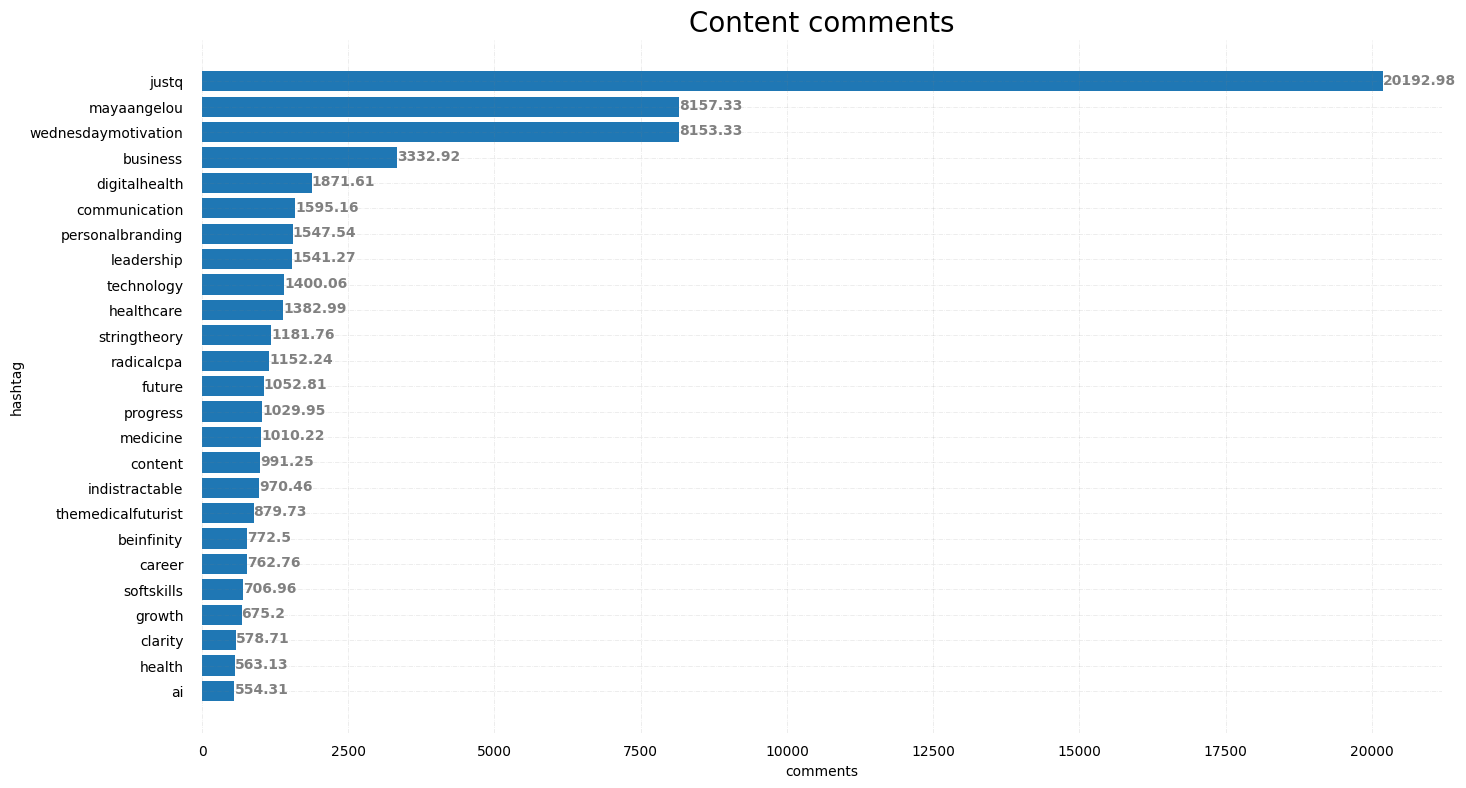

In [ ]:
myList1 = converted_dict1.items()
x, y = zip(*myList1)
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(x, y)
ax.set_ylabel('hashtag')
ax.set_xlabel('comments')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 # Add Plot Title
ax.set_title('Content comments',fontsize = 20) 

Text(0.5, 1.0, 'Content reactions')

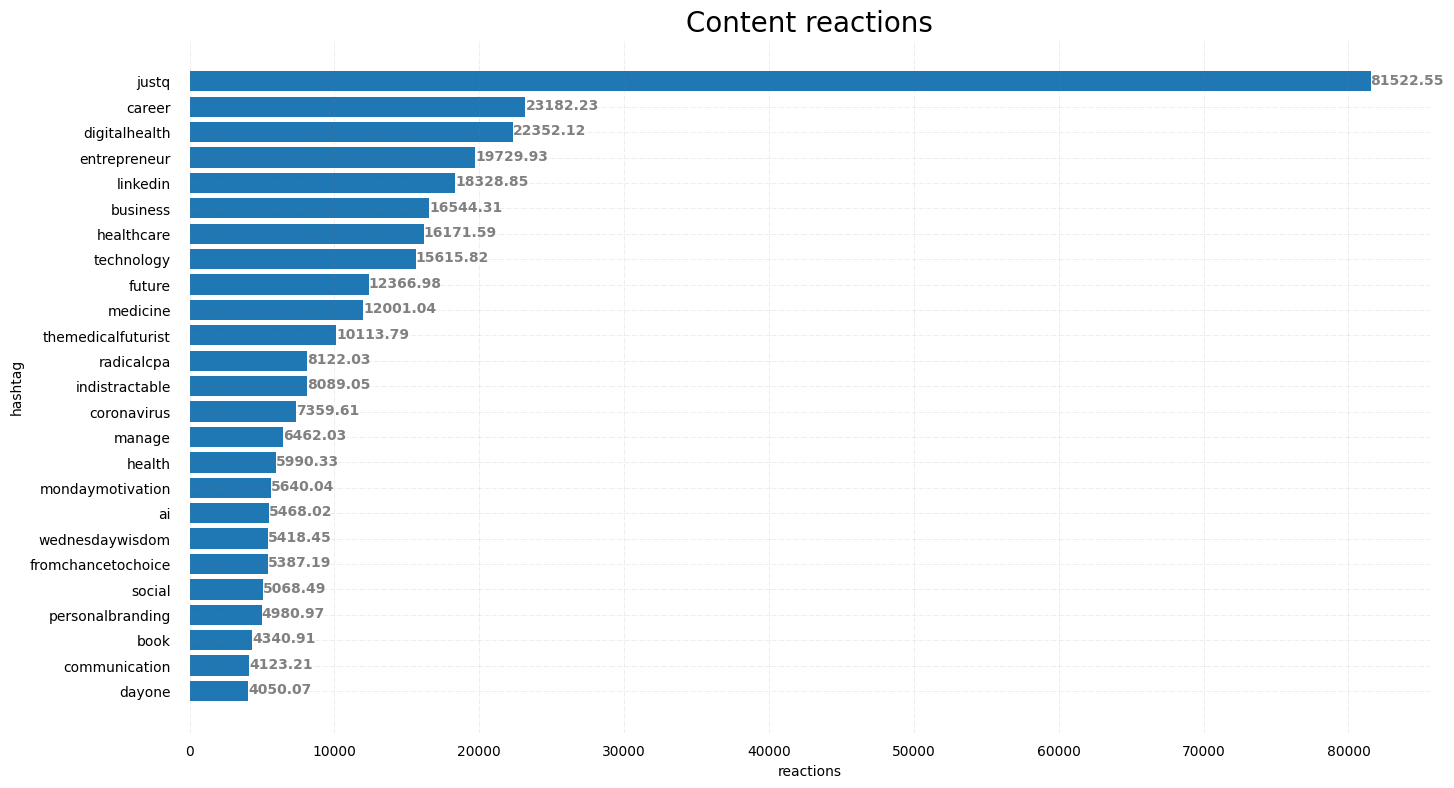

In [ ]:
myList2 = converted_dict2.items()
x, y = zip(*myList2)
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
# Horizontal Bar Plot
ax.barh(x, y)
ax.set_ylabel('hashtag')
ax.set_xlabel('reactions')
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
# Show top values
ax.invert_yaxis()
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 # Add Plot Title
ax.set_title('Content reactions',fontsize = 20) 